<a href="https://colab.research.google.com/github/tonybanjo2001/BAN6420_Module_6/blob/main/Module_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib tensorflow keras

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.7464 - loss: 0.6995 - val_accuracy: 0.8643 - val_loss: 0.3705
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8796 - loss: 0.3342 - val_accuracy: 0.8872 - val_loss: 0.3082
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.8966 - loss: 0.2798 - val_accuracy: 0.8740 - val_loss: 0.3363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9083 - loss: 0.2474 - val_accuracy: 0.8977 - val_loss: 0.2906
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 32ms/step - accuracy: 0.9171 - loss: 0.2255 - val_accuracy: 0.8986 - val_loss: 0.2737
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9244 - loss: 0.1993 - val_accuracy: 0.8996 - val_loss: 0.2743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9314 - loss: 0.1820 - val_accuracy: 0.9076 - val_loss: 0.2555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9396 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9099 - loss: 0.2897
Test accuracy: 0.9103999733924866


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


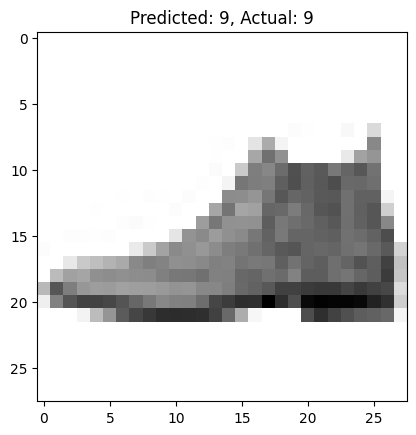

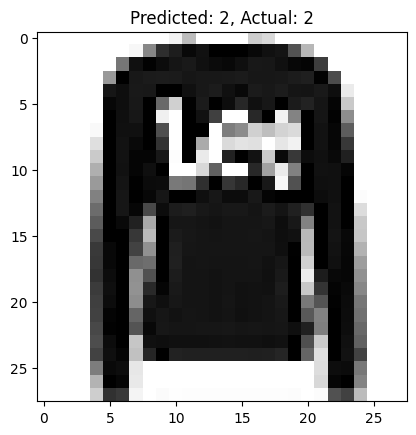

In [ ]:
# Make predictions for two images
predictions = model.predict(test_images[:2])

# Plot the first two test images and their predicted labels
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(test_labels[i])}")
    plt.show()